## Fraud Detection in Banking

### Module Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import EngFormatter #handles units in the axis
%matplotlib inline


### Data Import and Data Exploration

In [2]:
df = pd.read_csv("Bank_Transaction_Fraud_Detection.csv")
df.head(2)

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com


In [3]:
df.shape

(200000, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

#### Observation
- Most of the features are text based with only 4 numerical features. This means that we will have to encode some of this text features to numerical later. For example account type and transaction type.

- Correlation Matrix to show what numeric fields are correlated.

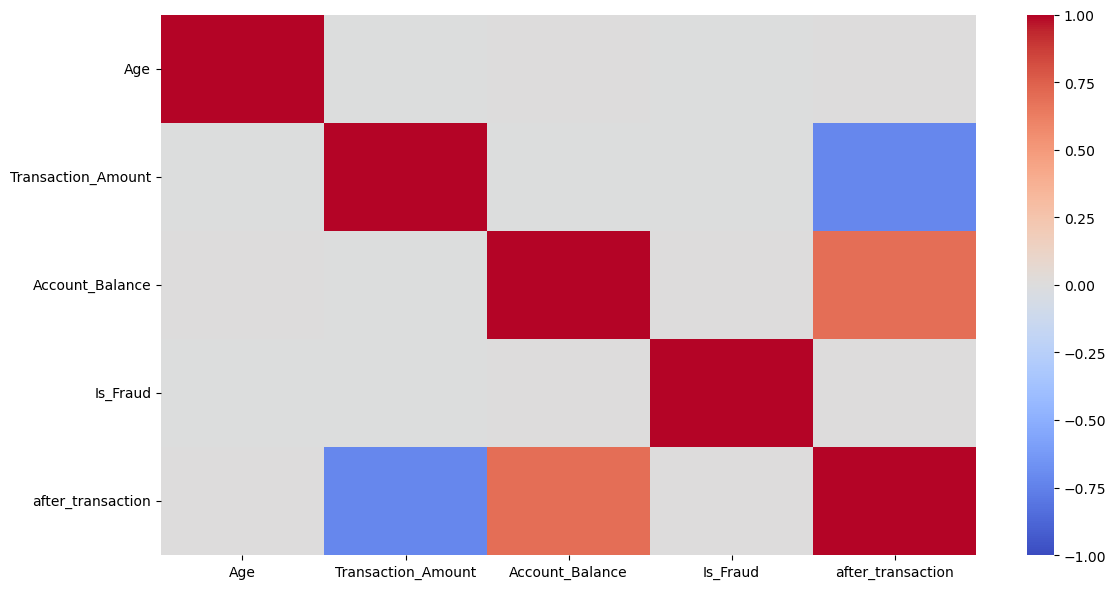

In [28]:
fig,ax = plt.subplots(figsize=(12,6))

df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, cmap="coolwarm", ax=ax)
plt.tight_layout()
plt.show()

#### Observation
- That dats as it is, has no correlation. We will revist the correlation check after doing some feature engineering

In [6]:
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


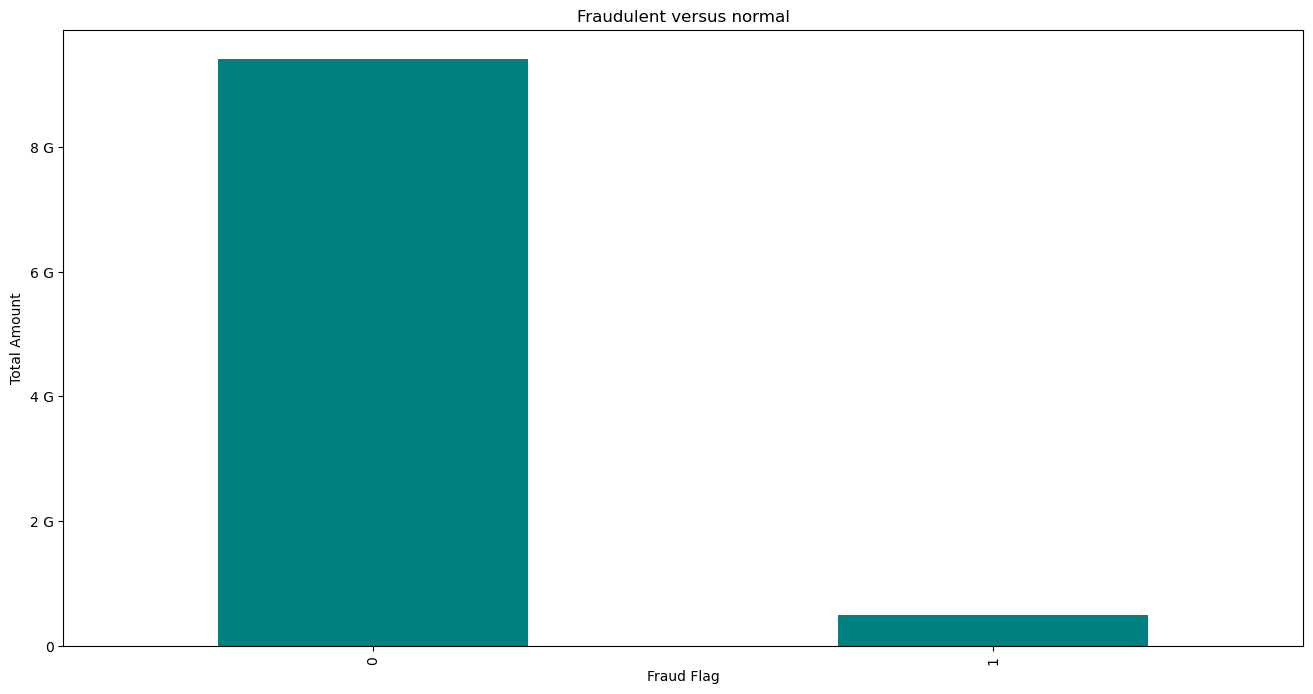

In [7]:
fig, ax = plt.subplots(figsize=(16,8))

df.groupby("Is_Fraud")["Transaction_Amount"].sum().plot(kind="bar", color="teal", ax=ax)

ax.yaxis.set_major_formatter(EngFormatter())
plt.ylabel("Total Amount")
plt.xlabel("Fraud Flag")
plt.title("Fraudulent versus normal")
plt.show()

In [8]:
is_fraud_df = df[df["Is_Fraud"] == 1]
is_fraud_df.shape

(10088, 24)

In [9]:
fraud_rate = (is_fraud_df.shape[0] / df.shape[0]) * 100
fraud_rate

5.044

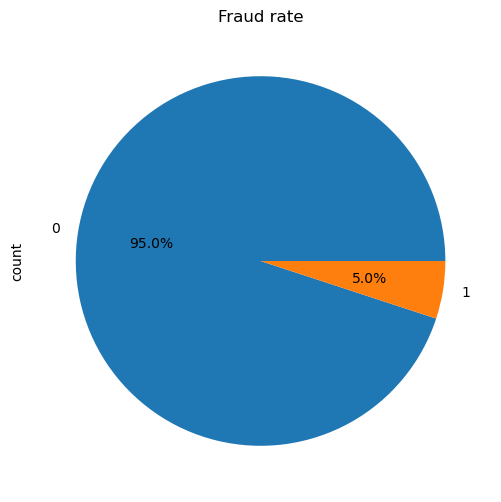

In [10]:
fig, ax = plt.subplots(figsize=(6,6))
df["Is_Fraud"].value_counts().plot(kind="pie",autopct="%1.1f%%",ax=ax)
plt.title("Fraud rate")
plt.show()

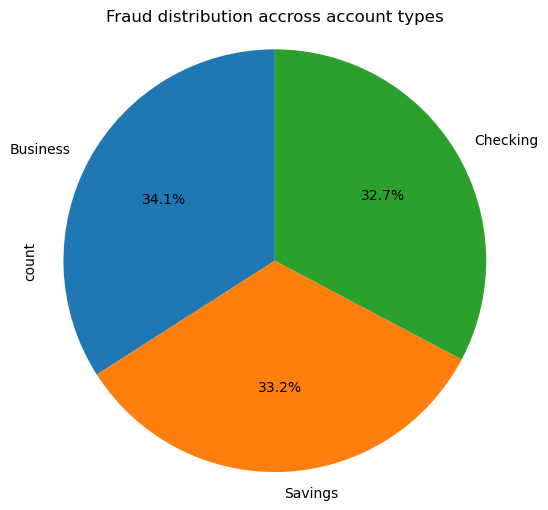

In [11]:
fig, ax = plt.subplots(figsize=(6,6))

is_fraud_df["Account_Type"].value_counts().plot(kind="pie", autopct="%1.1f%%",ax=ax, startangle=90)

plt.title("Fraud distribution accross account types")
plt.axis("equal")
plt.show()

In [12]:
is_fraud_df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,10088.000000,10088.000000,10088.000000,10088.0
mean,43.914453,49277.925242,52452.891412,1.0
std,15.265150,28739.518843,27300.467424,0.0
min,18.000000,10.410000,5003.420000,1.0
25%,31.000000,24420.042500,29122.987500,1.0
50%,44.000000,49162.945000,52344.725000,1.0
75%,57.000000,74068.717500,76116.032500,1.0
max,70.000000,98999.020000,99999.950000,1.0


In [13]:
bal_less_than_0_df = df[df["Account_Balance"] <= 0]
bal_less_than_0_df.shape[0]

0

In [14]:
transaction_bigger_than_bal = df[df["Transaction_Amount"] > df["Account_Balance"]]
transaction_bigger_than_bal.shape[0]

94071

In [15]:
transaction_bigger_than_bal[transaction_bigger_than_bal["Is_Fraud"] == 1].shape[0]

4705

In [16]:
nulls = df.isnull().sum().sum()
nulls

0

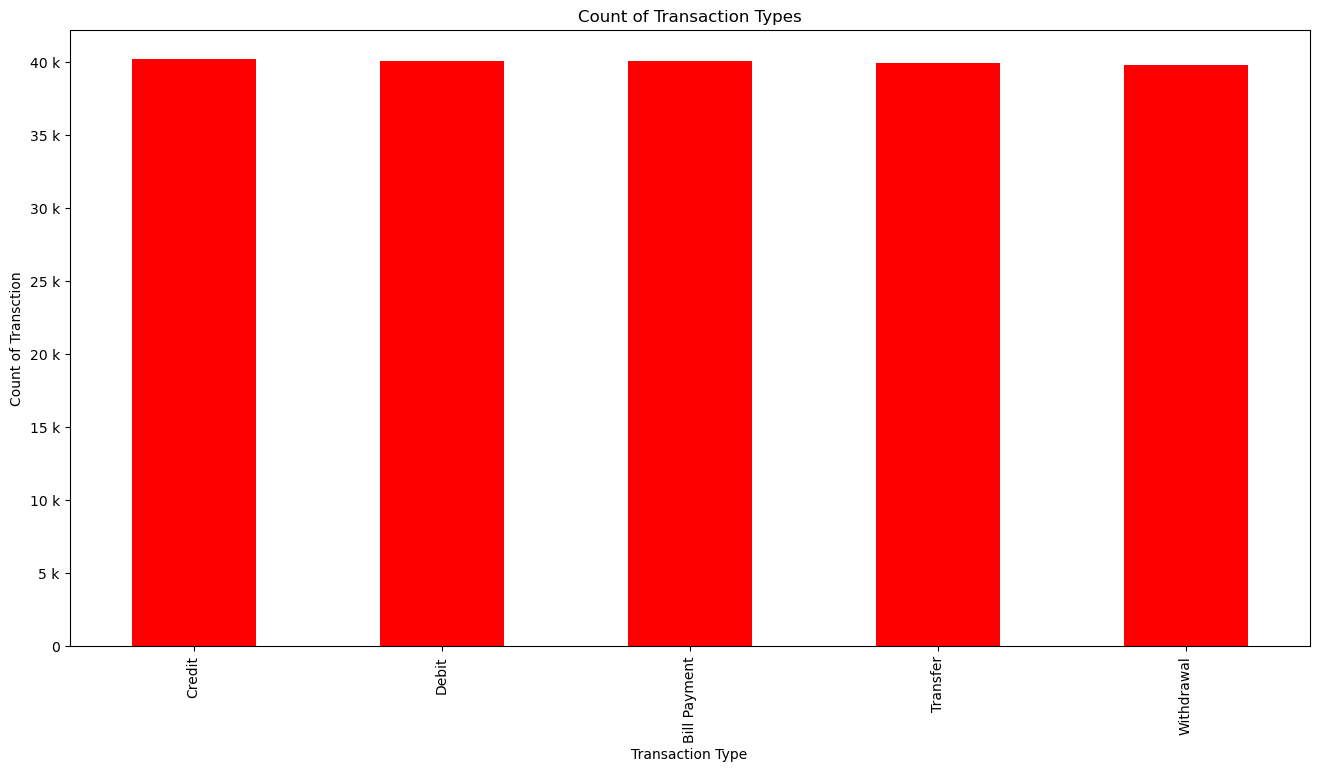

In [17]:
fig, ax = plt.subplots(figsize=(16,8))

df["Transaction_Type"].value_counts().plot(kind='bar',color='red', ax=ax) #groupby transaxtiontype and get count of each
ax.yaxis.set_major_formatter(EngFormatter()) #Handle x axis units

plt.xlabel("Transaction Type")
plt.ylabel("Count of Transction")
plt.title("Count of Transaction Types")

plt.show()

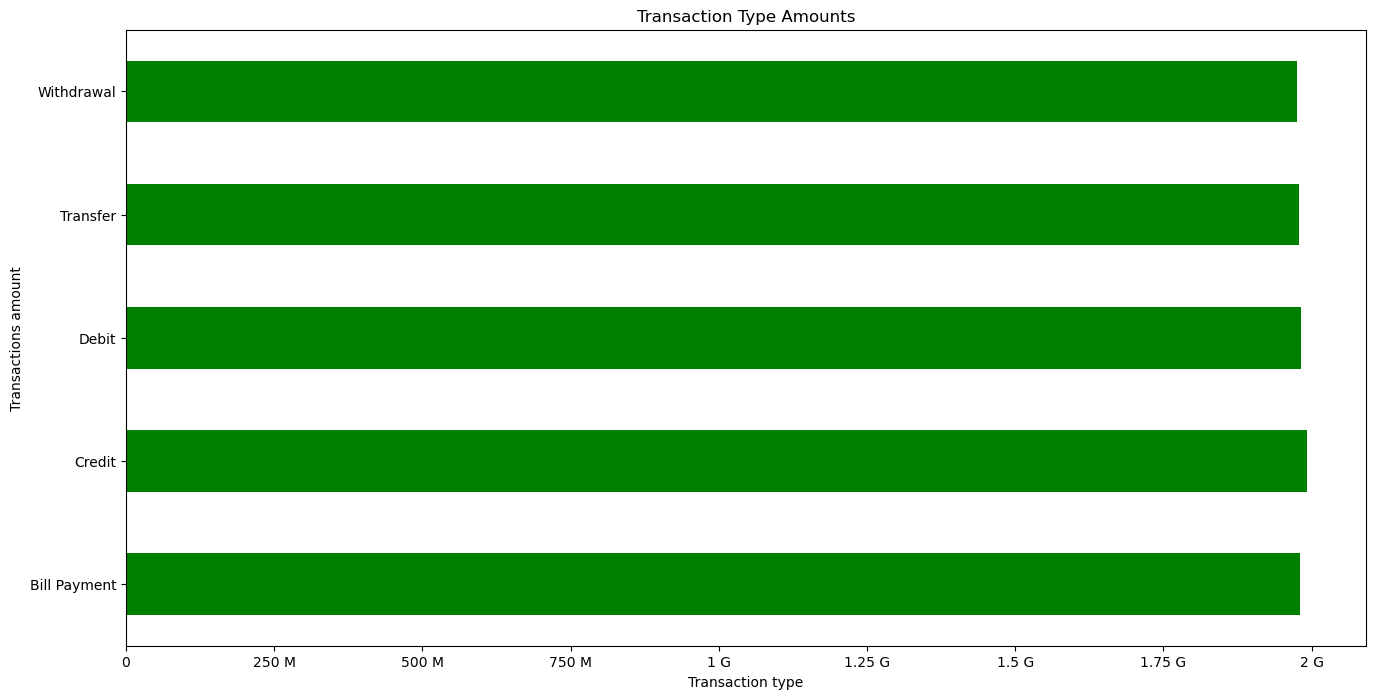

In [18]:
fig, ax = plt.subplots(figsize=(16,8))

df.groupby("Transaction_Type")["Transaction_Amount"].sum().plot(kind="barh", color="green", ax=ax)

ax.xaxis.set_major_formatter(EngFormatter()) #units conversion in axis

plt.xlabel("Transaction type")
plt.ylabel("Transactions amount")
plt.title("Transaction Type Amounts")
plt.show()

In [19]:
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')

### Account Type Analysis

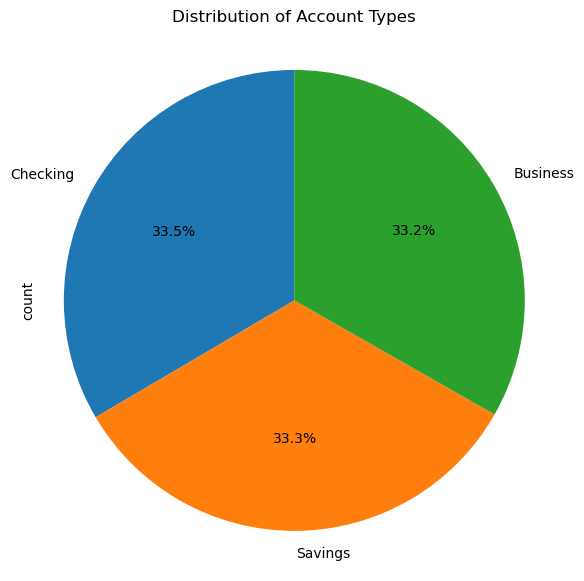

In [20]:
fig,ax = plt.subplots(figsize=(6,6))

df["Account_Type"].value_counts().plot(kind="pie", autopct='%1.1f%%', ax=ax, startangle=90)

plt.title("Distribution of Account Types")
plt.axis("equal")
plt.tight_layout()
plt.show()

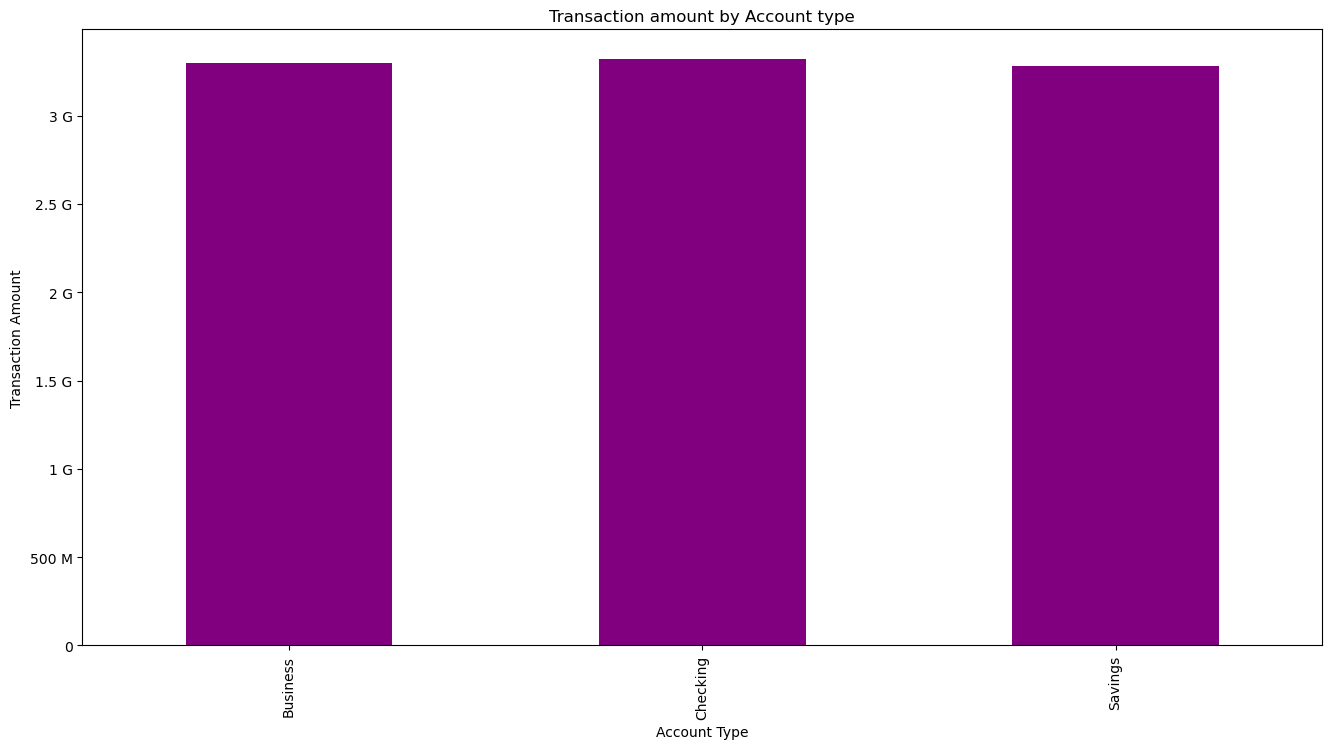

In [21]:
fig,ax = plt.subplots(figsize=(16,8))

df.groupby("Account_Type")["Transaction_Amount"].sum().plot(kind='bar',color='purple', ax=ax)

ax.yaxis.set_major_formatter(EngFormatter())
plt.title("Transaction amount by Account type")
plt.xlabel("Account Type")
plt.ylabel("Transaction Amount")
plt.show()



### Feature Engineering

Checking the balance after a transaction will help in determining if a transaction is fraudulent especially if it depletes an account or leaves an amount that is close to depletion.

In [22]:
df["after_transaction"] = df["Account_Balance"] - df["Transaction_Amount"] #checking balance after transaction
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud,after_transaction
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440,2899.973229
std,15.288774,28551.874004,27399.507128,0.218852,39606.279997
min,18.000000,10.290000,5000.820000,0.000000,-93714.400000
25%,31.000000,24851.345000,28742.395000,0.000000,-25579.012500
50%,44.000000,49502.440000,52372.555000,0.000000,2925.565000
75%,57.000000,74314.625000,76147.670000,0.000000,31361.772500
max,70.000000,98999.980000,99999.950000,1.000000,99719.480000


In [23]:
less_than_0_df = df[df['after_transaction'] < 0]
less_than_0_df.shape[0]

94071

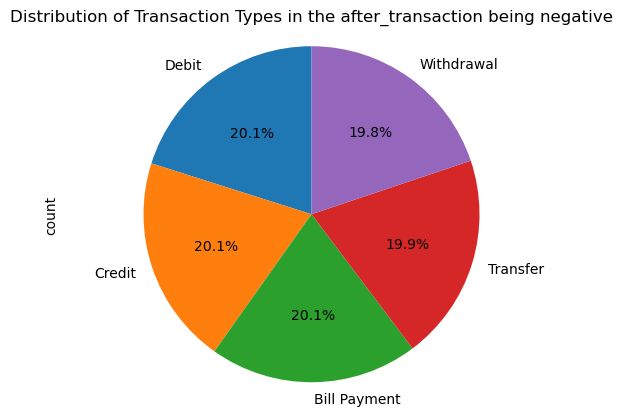

In [24]:
less_than_0_df["Transaction_Type"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Transaction Types in the after_transaction being negative")
plt.axis('equal')
plt.show()

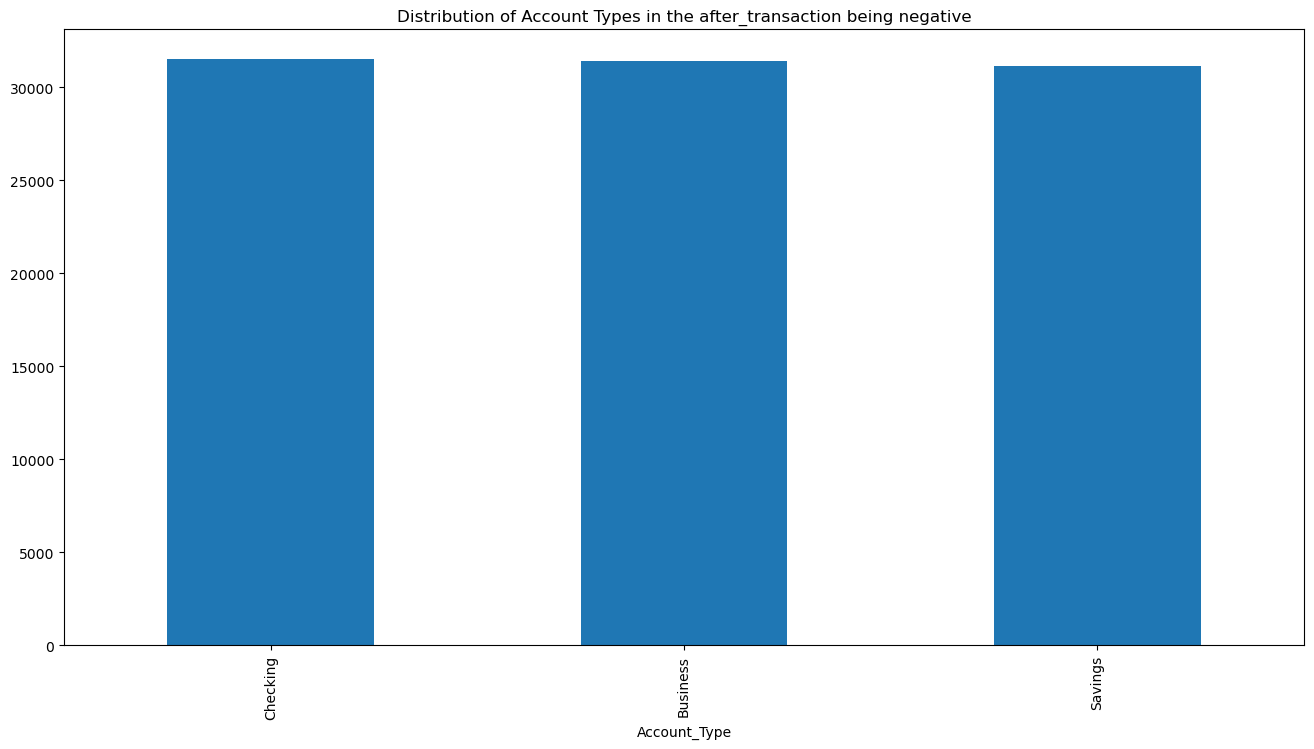

In [25]:
fig,ax = plt.subplots(figsize=(16,8))
less_than_0_df["Account_Type"].value_counts().plot(kind='bar',ax=ax)
plt.title("Distribution of Account Types in the after_transaction being negative")
plt.show()

<Axes: >

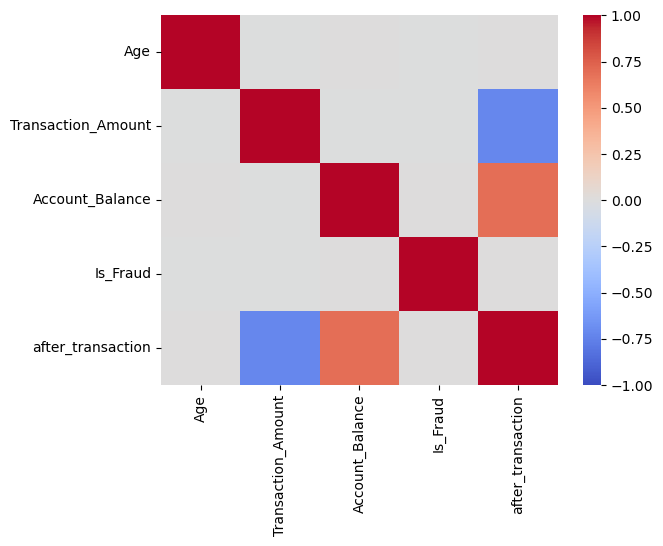

In [26]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", vmax=1,vmin=-1)

### Train Test Spliting

### Feature Scaling